# Volume 4: Optimal Control as Boundary Value Problems
    Daniel Perkins
    MATH 439
    1/30/25

In [1]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

## Problem 1
Given the following cost functional and boundary conditions, solve for and plot the optimal path and acceleration.
\begin{align*}
    J(u) &= \int_0^{30} x^2 + \frac{2\pi}{5}u^2dt \\
    s(t) &= \begin{bmatrix}x(t)\\x'(t) \end{bmatrix}, s(0) = \begin{bmatrix}0\\1 \end{bmatrix}, \quad s(30) = \begin{bmatrix}16\\10 \end{bmatrix}
\end{align*}
Plot your solutions for the optimal $x(t)$ and $u(t)$.

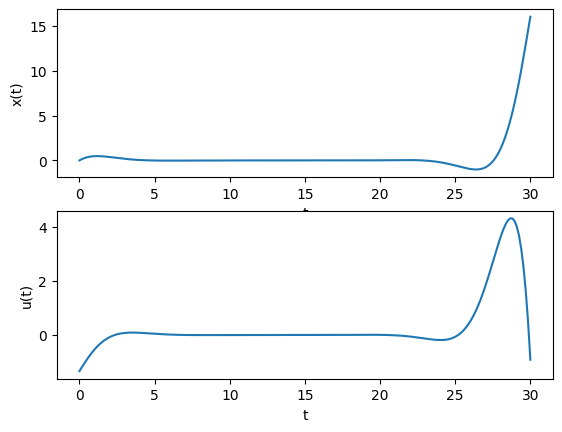

In [10]:
def prob1():
    '''
    Find the optimal path for the fixed time horizon problem
    '''    
    # (22.6)
    def ode(t, y):
        y_prime = np.array([y[1],
                        (5/(4*np.pi))*y[3],
                        2*y[0],
                        -y[2]])
        return y_prime
    
    # Boundary conditions
    def bc(ya, yb):
        return np.array([ya[0], ya[1]-1, yb[0]-16, yb[1]-10])  # y(0) = 0, y(pi/2) = 1
    
    # Set up line space and initial guess
    ts = np.linspace(0, 30, 200)
    y_guess = np.zeros((4, ts.size))
    
    # Solve the BVP
    sol = solve_bvp(ode, bc, ts, y_guess)
    x = sol.y[0]
    u = sol.yp[1]
    
    # Plot it
    plt.subplot(211)
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.plot(ts, x)
    plt.subplot(212)
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.plot(ts, u)
    plt.show()
    
    
prob1()
    

## Problem 2 
Using the ODEs found in 14.7 and 14.11, the obstacle function 14.8, and the following boundary conditions and parameters solve for and plot the optimal path.
\begin{align*}
    t_0 = 0 &, \quad t_f = 20\\
    (c_x,c_y) &= (4,1)\\
    (r_x,r_y) &= (5,.5)\\
    \lambda &= 20\\
    s_0 = \begin{bmatrix}6\\1.5\\0\\0 \end{bmatrix}&, \quad s_f = \begin{bmatrix}0\\0\\0\\0 \end{bmatrix}
\end{align*}
You will need to choose a $W_1$ and $W_2$ which allow the solver to find a valid path.
If these parameters are not chosen correctly, the solver may find a path which goes through the obstacle, not around it.
Plot the obstacle using plt.contour() to be certain path doesn't pass through the obstacle. Also plot the initial guess for $x$ and $y$ provided to solve_bvp

In [8]:
def obstacle(x, y, W1=1, r=(1, 1), c=(0, 0)):
    '''
    Define an area that will represent an obstacle
    
    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    ellipse = ((x - c[0])**2/r[0] + (y - c[1])**2/r[1])**20 + 1

    return W1 / ellipse

def obstacle_dx(x, y, W1=1, r=(1, 1,), c=(0, 0)):
    '''
    x derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (x-c[0])*(circle)**19
    denom = r[0]*((circle)**20 + 1)**2

    return numer / denom

def obstacle_dy(x, y, W1=1, r=(1, 1,), c=(0, 0)):
    '''
    y derivative of the obstacle

    Parameters:
        x (float): x position in space
        y (float): y position in space
        W1 (float): weight of cost
        r (tuple): radius in x and y direction
        c (tuple): center of the ellipse
    '''

    circle = (x - c[0])**2/r[0] + (y - c[1])**2/r[1]
    numer = -40 * W1 * (y-c[1])*(circle)**19
    denom = r[1]*((circle)**20 + 1)**2

    return numer / denom

In [7]:
def prob2():
    '''
    Find the optimal path for the fixed time horizon problem
    '''
    raise NotImplementedError("Problem 2 Incomplete")

## Problem 3
Solve the following boundary value problem:
\begin{align*}
    y'' + 3y &= \sin(t)\\
    y(0) = 0,\quad y(t_f) = &\frac{\pi}{2}, \quad y'(t_f) = \frac{1}{2}\left(\sqrt{3}\pi \cot(\pi\sqrt{75}) - 1 \right).
\end{align*}
Plot your solution. What $t_f$ did the solver find?

In [9]:
def prob3():
    '''
    Solve the free time horizon BVP.
    Plot the solution and return the correct end time
    '''
    raise NotImplementedError("Problem 3 Incomplete")    

## Problem 4
Refactor your code from Problem 2 to create a free end time BVP and use a new boundary value derived from 

$H(t_f,p(t_f),s(t_f),u(t_f)) = 0.$

Let $W_1 = 4$ and $W_2 = 0.1$, and use $6$ as the initial guess for p(0) and max_nodes = 60000.
Plot the solution you found along with the initial guess for $x$ and $y$.
What is the optimal time?

In [ ]:
def prob4():
    '''
    Find the optimal path and time for the free time horizon problem.
    Plot the solution along with the initial guess for $x$ and $y$ and return the optimal time.
    '''
    raise NotImplementedError("Problem 4 Incomplete") 